In [25]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import numpy as np

In [26]:
# Funcion de activacion 
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [27]:
# Inicializacion de los parametros 
def initialize_parameters(n_x, n_h, n_y):
    W1 = np.random.randn(n_h, n_x)
    b1 = np.random.randn(n_h, 1)
    W2 = np.random.randn(n_y, n_h)
    b2 = np.random.randn(n_y, 1)
    
    parameters = {
        "W1": W1,
        "b1" : b1,
        "W2": W2,
        "b2" : b2
    }
    return parameters

In [28]:
def forward_prop(X, parameters):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)

    cache = {
        "A1": A1,
        "A2": A2
    }
    return A2, cache

In [29]:
# Funcion de perdida
def mse_loss_function(A2, Y):
    m = Y.shape[1]
    cost = np.sum(np.square(A2 - Y)) / m
    return cost

In [30]:
def backward_prop(X, Y, cache, parameters):
    A1 = cache["A1"]
    A2 = cache["A2"]

    W2 = parameters["W2"]

    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T)/m
    db2 = np.sum(dZ2, axis=1, keepdims=True)/m
    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1-np.power(A1, 2))
    dW1 = np.dot(dZ1, X.T)/m
    db1 = np.sum(dZ1, axis=1, keepdims=True)/m

    grads = {
        "dW1": dW1,
        "db1": db1,
        "dW2": dW2,
        "db2": db2
    }

    return grads

In [31]:
def update_parameters(parameters, grads, learning_rate):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]

    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2
    
    new_parameters = {
        "W1": W1,
        "W2": W2,
        "b1" : b1,
        "b2" : b2
    }

    return new_parameters

In [32]:
def model(X, Y, n_x, n_h, n_y, num_of_iters, learning_rate):
    parameters = initialize_parameters(n_x, n_h, n_y)
    costs= []

    for i in range(0, num_of_iters+1):
        a2, cache = forward_prop(X, parameters)

        cost = mse_loss_function(a2, Y)

        grads = backward_prop(X, Y, cache, parameters)

        parameters = update_parameters(parameters, grads, learning_rate)

        if(i%100 == 0):
            costs.append(cost)
            print('Cost after iteration# {:d}: {:f}'.format(i, cost))

    return parameters, costs

In [33]:
def predict(X, parameters):
    a2, cache = forward_prop(X, parameters)
    yhat = a2
    yhat = np.squeeze(yhat)
    if(yhat >= 0.5):
        y_predict = 1
    else:
        y_predict = 0

    return y_predict

In [34]:
np.random.seed(2)

# The 4 training examples by columns
X = np.array([[0, 0, 1, 1], [0, 1, 0, 1]])

# The outputs of the XOR for every example in X
Y = np.array([[0, 1, 1, 0]])

# No. of training examples
m = X.shape[1]

# Set the hyperparameters
n_x = 2     #No. of neurons in first layer
n_h = 2     #No. of neurons in hidden layer
n_y = 1     #No. of neurons in output layer
num_of_iters = 1000
learning_rate = 0.5

trained_parameters, costs = model(X, Y, n_x, n_h, n_y, num_of_iters, learning_rate)

X_test = np.array([[1], [1]])
prediction, _ = forward_prop(X_test, trained_parameters)

print(f'prediction: {prediction}')

#final parameters
for key, value in trained_parameters.items():
    print(f"{key}:\n{value}")

Cost after iteration# 0: 0.357529
Cost after iteration# 100: 0.250383
Cost after iteration# 200: 0.249958
Cost after iteration# 300: 0.249750
Cost after iteration# 400: 0.249391
Cost after iteration# 500: 0.248007
Cost after iteration# 600: 0.182946
Cost after iteration# 700: 0.134526
Cost after iteration# 800: 0.129151
Cost after iteration# 900: 0.127603
Cost after iteration# 1000: 0.126885
prediction: [[0.50251411]]
W1:
[[-3.47741087 -1.7354283 ]
 [-3.8730281   2.46419734]]
W2:
[[-3.19808736  3.21043544]]
b1:
[[ 0.51091584]
 [-1.69520283]]
b2:
[[0.01003158]]


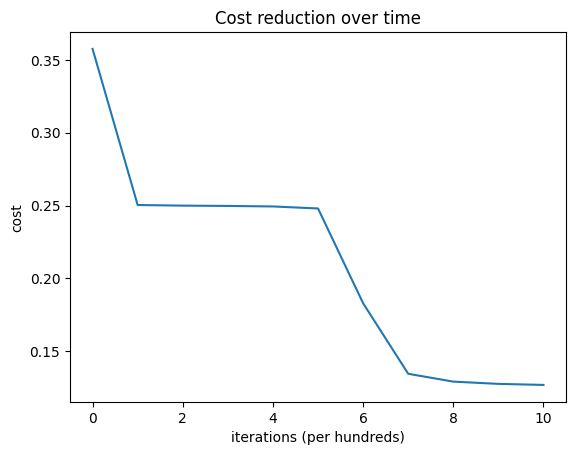

In [35]:
#plot the cost
import matplotlib.pyplot as plt
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title('Cost reduction over time')
plt.show()